#Sales Analysis



#### Importing the necessary libraries


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#### Transfer raw data into a dataframe

In [4]:
csv_files = ['https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_January_2019.csv', 'https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_February_2019.csv', 'https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_March_2019.csv', 'https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_April_2019.csv', 'https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_May_2019.csv', 'https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_June_2019.csv', 'https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_July_2019.csv', 'https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_August_2019.csv', 'https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_September_2019.csv', 'https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_October_2019.csv', 'https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_November_2019.csv', 'https://raw.githubusercontent.com/i-am-darshil/Data-Analysis-With-Pandas/main/SalesData/Sales_December_2019.csv']

df = pd.concat((pd.read_csv(f) for f in csv_files))

print(df.head(17))

   Order ID                     Product Quantity Ordered Price Each  \
0    141234                      iPhone                1        700   
1    141235    Lightning Charging Cable                1      14.95   
2    141236            Wired Headphones                2      11.99   
3    141237            27in FHD Monitor                1     149.99   
4    141238            Wired Headphones                1      11.99   
5    141239      AAA Batteries (4-pack)                1       2.99   
6    141240      27in 4K Gaming Monitor                1     389.99   
7    141241        USB-C Charging Cable                1      11.95   
8    141242  Bose SoundSport Headphones                1      99.99   
9    141243    Apple Airpods Headphones                1        150   
10   141244    Apple Airpods Headphones                1        150   
11   141245          Macbook Pro Laptop                1       1700   
12   141246      AAA Batteries (4-pack)                3       2.99   
13   1

#### Exploring to see the extent of non-viable rows

In [5]:
nan_count = df.isna().sum(axis=0)
print(nan_count)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


#### Finding total length of the data frame

In [6]:
length = df.sum(axis=1)
print(length)

0        141234iPhone170001/22/19 21:25944 Walnut St, B...
1        141235Lightning Charging Cable114.9501/28/19 1...
2        141236Wired Headphones211.9901/17/19 13:33538 ...
3        14123727in FHD Monitor1149.9901/05/19 20:33738...
4        141238Wired Headphones111.9901/25/19 11:59387 ...
                               ...                        
25112    319666Lightning Charging Cable114.9512/11/19 2...
25113    319667AA Batteries (4-pack)23.8412/01/19 12:01...
25114    319668Vareebadd Phone140012/09/19 06:43273 Wil...
25115    319669Wired Headphones111.9912/03/19 10:39778 ...
25116    319670Bose SoundSport Headphones199.9912/21/19...
Length: 186850, dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


####Getting rid of the non-viable rows

In [8]:
df_clean = df.dropna()
df_reset = df_clean.reset_index(drop=True)
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


#### Getting rid of some more non-viable rows

In [9]:
df_reset.drop(df_reset[df_reset['Quantity Ordered'] == "Quantity Ordered"].index, inplace=True)

#### Set the data to integers so we can work with it

In [10]:
df_reset['Quantity Ordered'] = df_reset['Quantity Ordered'].astype(int)
df_reset['Price Each'] = df_reset['Price Each'].astype(float)
df_reset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


#### Checking to see if it worked

In [11]:
print(df_reset)

       Order ID                     Product  Quantity Ordered  Price Each  \
0        141234                      iPhone                 1      700.00   
1        141235    Lightning Charging Cable                 1       14.95   
2        141236            Wired Headphones                 2       11.99   
3        141237            27in FHD Monitor                 1      149.99   
4        141238            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186300   319666    Lightning Charging Cable                 1       14.95   
186301   319667       AA Batteries (4-pack)                 2        3.84   
186302   319668             Vareebadd Phone                 1      400.00   
186303   319669            Wired Headphones                 1       11.99   
186304   319670  Bose SoundSport Headphones                 1       99.99   

            Order Date                        Purchase Address  
0       01

#### Creating a new Column

In [12]:
df_reset["Total Price"] = df_reset["Quantity Ordered"] * df_reset["Price Each"]
df_reset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99
...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",14.95
186301,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",7.68
186302,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",400.00
186303,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",11.99


#### Creating a State column

In [13]:
df_reset["State"] = df_reset['Purchase Address'].str[-8:-6]
df_reset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,State
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,TX
...,...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",14.95,CA
186301,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",7.68,CA
186302,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",400.00,WA
186303,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",11.99,TX


#### Finding the State with the largest income

In [14]:
df_reset
df_sorted = df_reset.sort_values(by='State')
greatest = 0
current = 0
currentState = ""
bestState = ""
States = set(df_sorted["State"])
for i in range(len(list(States))):
  currentState = list(States)[i]
  current = round((df_sorted[df_sorted["State"] == currentState]["Total Price"]).sum(),2)
  if current > greatest:
    greatest = current
    bestState = currentState
print(bestState, greatest)

CA 13714774.71


# Expoloring how to plot with matplotlib

State vs. Revenue

<Axes: title={'center': 'STATE REVENUE'}, xlabel='State', ylabel='Total Revenue (in millions)'>

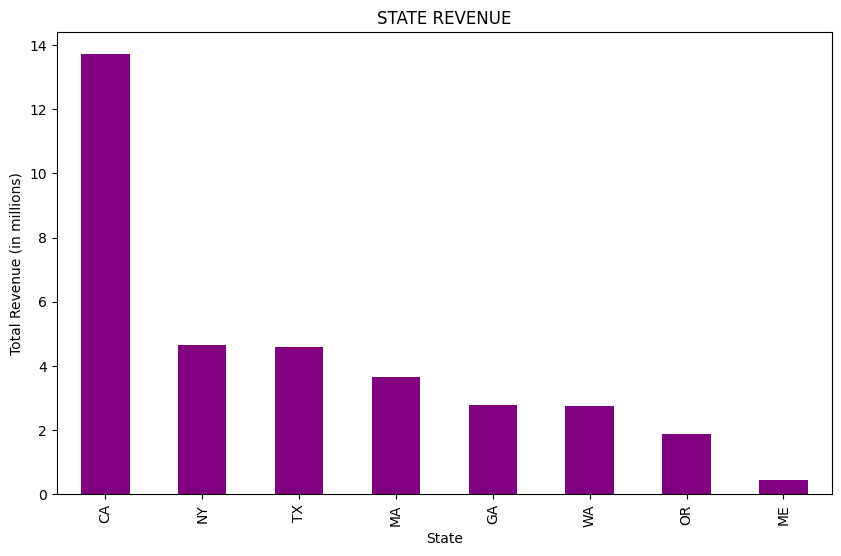

In [19]:
df_reset
df_sorted = df_reset.sort_values(by='State', ascending=False)
state_values = df_reset.groupby("State")["Total Price"].sum()/1000000
state_values = state_values.sort_values(ascending=False)


# # Data to plot

# # Create a plot
# plt.plot(x, y)

# # Add a title and labels
# plt.title('Simple Line Plot')
# plt.xlabel('State')
# # plt.ylabel('Total Revenue')
# plt.plot(x, y, color='green', linestyle='--', marker='x')

# Show the plot

plt.title('STATE REVENUE')
plt.ylabel("Total Revenue (in millions)")
plt.ticklabel_format(style='plain', axis='y')
state_values.plot(kind='bar', color = "purple", figsize=(10, 6))

<Axes: title={'center': 'Product vs. Product Revenue'}, xlabel='Product', ylabel='Total Revenue (in thousands)'>

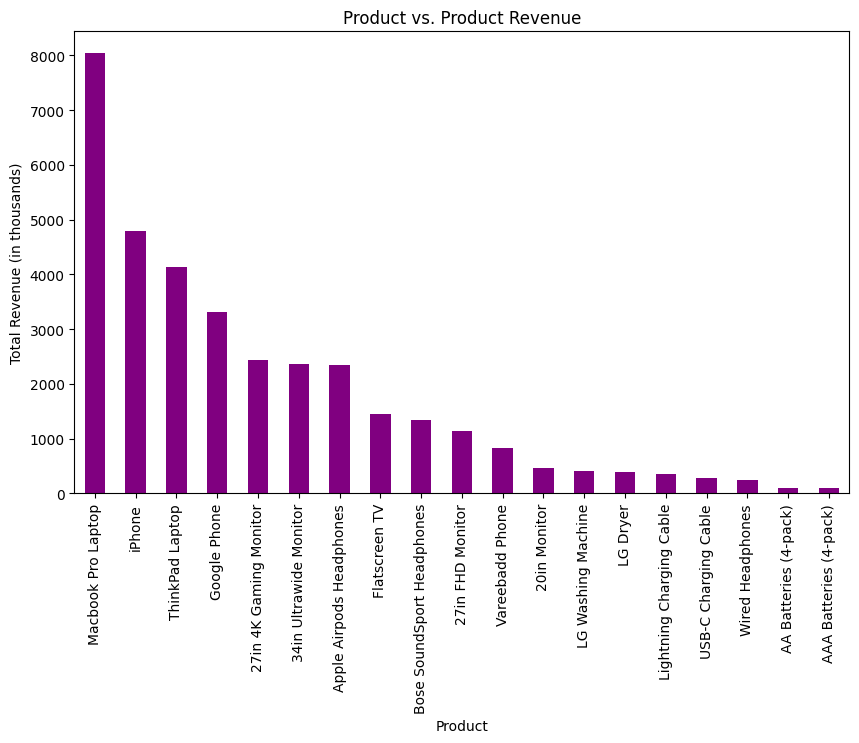

In [16]:

df_reset
df_sorted = df_reset.sort_values(by='Product', ascending=False)
state_values = df_reset.groupby("Product")["Total Price"].sum()/1000
state_values = state_values.sort_values(ascending=False)


# # Data to plot

# # Create a plot
# plt.plot(x, y)

# # Add a title and labels
# plt.title('Simple Line Plot')
# plt.xlabel('State')
# # plt.ylabel('Total Revenue')
# plt.plot(x, y, color='green', linestyle='--', marker='x')

# Show the plot

plt.title('Product vs. Product Revenue')
plt.ylabel("Total Revenue (in thousands)")
plt.ticklabel_format(style='plain', axis='y')
state_values.plot(kind='bar', color = "purple", figsize=(10, 6))

<Axes: title={'center': 'Product vs. Quantity Ordered'}, xlabel='Product', ylabel='Ordered'>

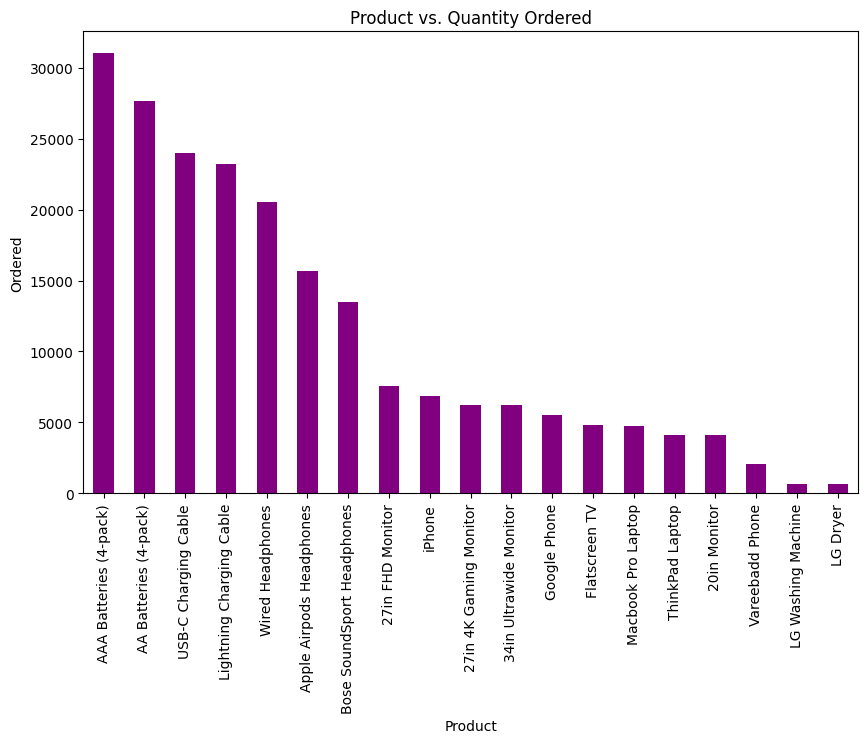

In [17]:
import matplotlib.pyplot as plt
#product vs. quantity
df_sorted = df_reset.sort_values(by='Product', ascending=False)
state_values = df_reset.groupby("Product")["Quantity Ordered"].sum()
state_values = state_values.sort_values(ascending=False)


# # Data to plot

# # Create a plot
# plt.plot(x, y)

# # Add a title and labels
# plt.title('Simple Line Plot')
# plt.xlabel('State')
# # plt.ylabel('Total Revenue')
# plt.plot(x, y, color='green', linestyle='--', marker='x')

# Show the plot

plt.title('Product vs. Quantity Ordered')
plt.ylabel("Ordered")
plt.ticklabel_format(style='plain', axis='y')
state_values.plot(kind='bar', color = "purple", figsize=(10, 6))

In [18]:
df_reset["hour"] = df_reset["Order Date"][9:11]
print(df_reset["Order Date"][9:11])
df_reset

9     01/22/19 21:20
10    01/07/19 11:29
Name: Order Date, dtype: object


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,State,hour
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,MA,NaN
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,OR,NaN
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,CA,NaN
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,CA,NaN
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,TX,NaN
...,...,...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",14.95,CA,NaN
186301,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",7.68,CA,NaN
186302,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",400.00,WA,NaN
186303,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",11.99,TX,NaN
